In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
%matplotlib inline

In [3]:
ts = pd.read_csv('billtopsong.csv')

In [4]:
ts['artists'] = ts['artists'].map(lambda i: i.split(' Featuring')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split(',')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split(' &')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split(' +')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split('Jay Z ')[0])
ts['artists'] = ts['artists'].map(lambda x: re.sub('Jay[ ]+Z', 'Jay-Z', x))
counts = pd.DataFrame({'artists':ts.artists.value_counts().index, 'count':ts.artists.value_counts().values})
ts_count = pd.merge(ts, counts, on='artists', how='right')

In [5]:
counts_graph = counts.head(20)

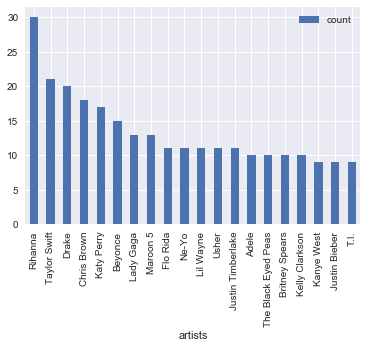

In [48]:
counts_graph.plot(x='artists', y='count', kind='bar')
plt.xticks(rotation='vertical')
plt.show()

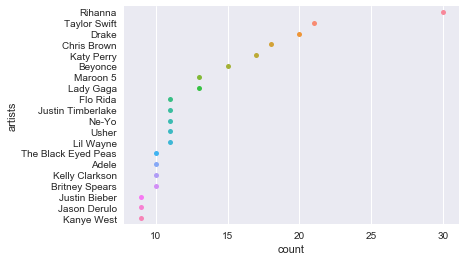

In [7]:
sns.stripplot(x="count", y="artists", data=counts_graph)

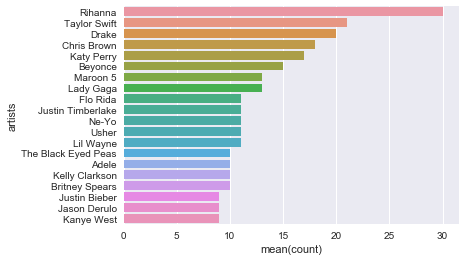

In [39]:
sns.barplot(x="count", y="artists", data=counts_graph)

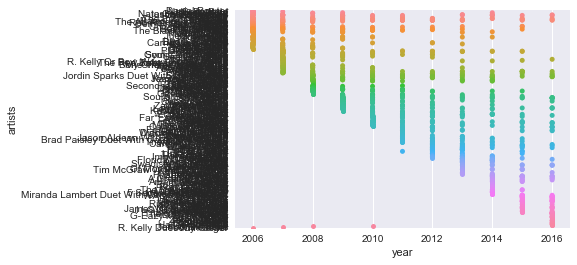

In [34]:
sns.swarmplot(x='year',y='artists',data=ts_count)

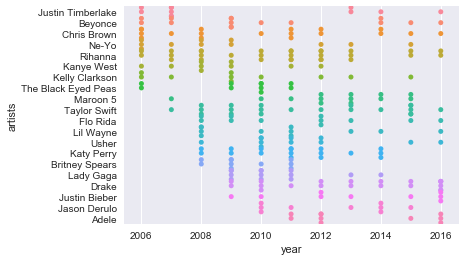

In [9]:
swarm = ts_count[ts_count['artists'].isin(counts_graph.artists)]
sns.swarmplot(x='year',y='artists',data=swarm)

In [15]:
top_artist = pd.read_csv('billtopar.csv')

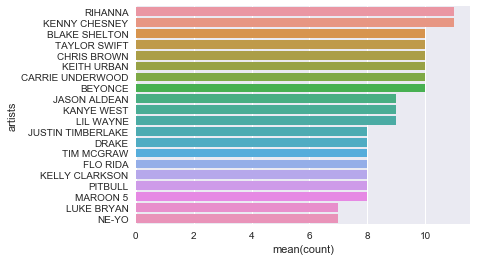

In [16]:
ta = pd.DataFrame({'artists':top_artist.artists.value_counts().index, 'count':top_artist.artists.value_counts().values})
ta_head = ta.head(20)
sns.barplot(x="count", y="artists", data=ta_head);

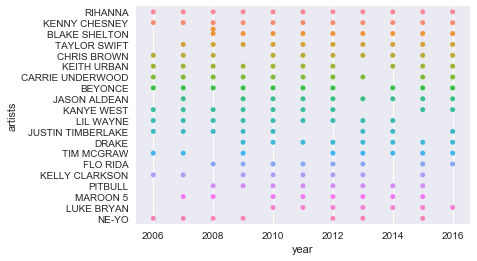

In [17]:
ta_count = pd.merge(ta, top_artist, on='artists', how='right')
swarma = ta_count[ta_count['artists'].isin(ta_head.artists)]
sns.swarmplot(x='year',y='artists',data=swarma)

In [76]:
all_time = pd.read_csv('billall.csv')
all_time = all_time.rename(columns={'name': 'artists'})

In [77]:
all_time_count = pd.merge(all_time, ta, on='artists', how='right')
all_time_count = all_time_count.head(25)

In [3]:
top_rap = pd.read_csv('billtoprap.csv')

In [6]:
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split(' Featuring')[0])
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split(',')[0])
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split(' &')[0])
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split(' +')[0])
top_rap['artists'] = top_rap['artists'].map(lambda i: i.split('Jay Z ')[0])
top_rap['artists'] = top_rap['artists'].map(lambda x: re.sub('Jay[ ]+Z', 'Jay-Z', x))
rap_counts = pd.DataFrame({'artists':top_rap.artists.value_counts().index, 'count':top_rap.artists.value_counts().values})
tr_count = pd.merge(top_rap, rap_counts, on='artists', how='right')
tr_counts_graph = rap_counts.head(20)

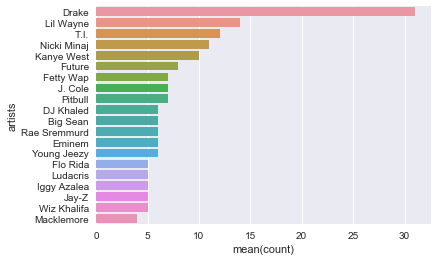

In [7]:
sns.barplot(x="count", y="artists", data=tr_counts_graph)

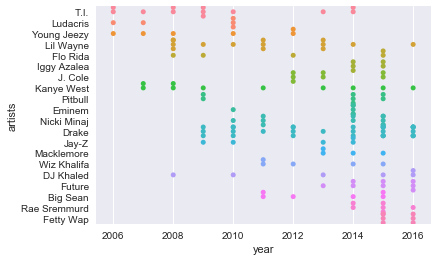

In [8]:
rap_swarm = tr_count[tr_count['artists'].isin(tr_counts_graph.artists)]
sns.swarmplot(x='year',y='artists',data=rap_swarm)

In [3]:
top_rb = pd.read_csv('billtoprb.csv')

In [4]:
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split(' Featuring')[0])
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split(',')[0])
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split(' &')[0])
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split(' +')[0])
top_rb['artists'] = top_rb['artists'].map(lambda i: i.split('Jay Z ')[0])
top_rb['artists'] = top_rb['artists'].map(lambda x: re.sub('Jay[ ]+Z', 'Jay-Z', x))
rb_counts = pd.DataFrame({'artists':top_rb.artists.value_counts().index, 'count':top_rb.artists.value_counts().values})
trb_count = pd.merge(top_rb, rb_counts, on='artists', how='right')
trb_counts_graph = rb_counts.head(20)

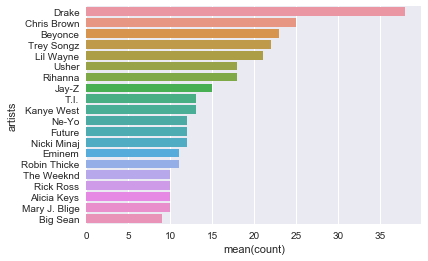

In [5]:
sns.barplot(x="count", y="artists", data=trb_counts_graph)

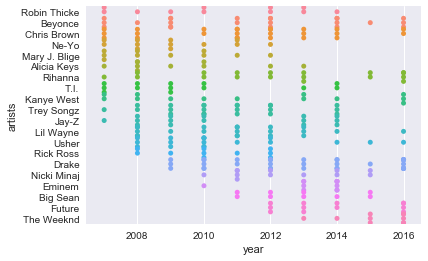

In [6]:
swarmrb = trb_count[trb_count['artists'].isin(trb_counts_graph.artists)]
sns.swarmplot(x='year',y='artists',data=swarmrb)

In [7]:
top_rock = pd.read_csv('billtoprock.csv')

In [8]:
top_rock['artists'] = top_rock['artists'].map(lambda i: i.split(' Featuring')[0])
top_rock['artists'] = top_rock['artists'].map(lambda i: i.split(',')[0])
top_rock['artists'] = top_rock['artists'].map(lambda i: i.split(' &')[0])
top_rock['artists'] = top_rock['artists'].map(lambda i: i.split(' +')[0])
rock_counts = pd.DataFrame({'artists':top_rock.artists.value_counts().index, 'count':top_rock.artists.value_counts().values})
trock_count = pd.merge(top_rock, rock_counts, on='artists', how='right')
trock_counts_graph = rock_counts.head(20)

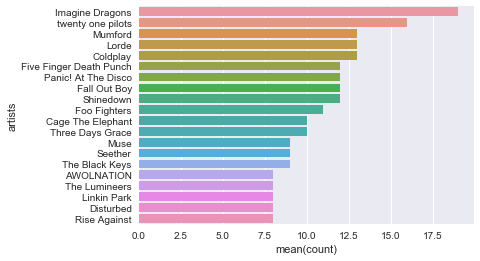

In [9]:
sns.barplot(x="count", y="artists", data=trock_counts_graph)

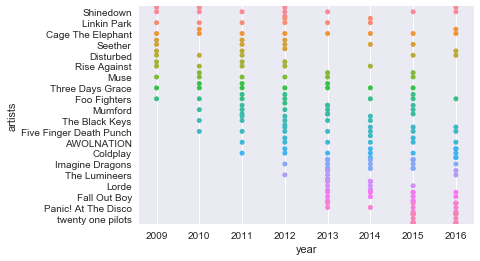

In [10]:
swarmrock = trock_count[trock_count['artists'].isin(trock_counts_graph.artists)]
sns.swarmplot(x='year',y='artists',data=swarmrock)

In [21]:
topc = pd.read_csv('billtopcountry.csv')

In [23]:
topc['artists'] = topc['artists'].map(lambda i: i.split(' Featuring')[0])
topc['artists'] = topc['artists'].map(lambda i: i.split(',')[0])
topc['artists'] = topc['artists'].map(lambda i: i.split(' &')[0])
topc['artists'] = topc['artists'].map(lambda i: i.split(' +')[0])
c_counts = pd.DataFrame({'artists':topc.artists.value_counts().index, 'count':topc.artists.value_counts().values})
tc_count = pd.merge(topc, c_counts, on='artists', how='right')
tc_counts_graph = c_counts.head(20)

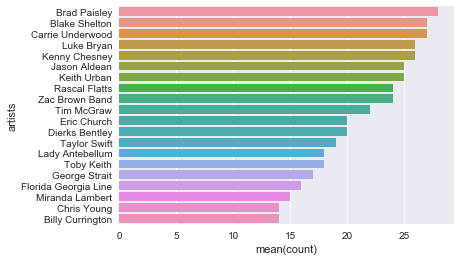

In [24]:
sns.barplot(x="count", y="artists", data=tc_counts_graph)

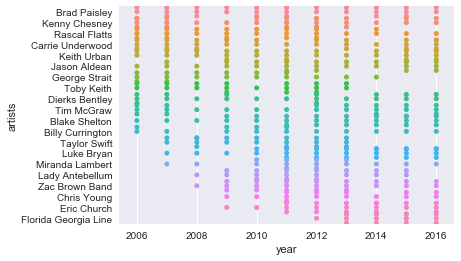

In [26]:
swarmc = tc_count[tc_count['artists'].isin(tc_counts_graph.artists)]
sns.swarmplot(x='year',y='artists',data=swarmc)

In [28]:
tope = pd.read_csv('billtopedm.csv')

In [29]:
tope['artists'] = tope['artists'].map(lambda i: i.split(' Featuring')[0])
tope['artists'] = tope['artists'].map(lambda i: i.split(',')[0])
tope['artists'] = tope['artists'].map(lambda i: i.split(' &')[0])
tope['artists'] = tope['artists'].map(lambda i: i.split(' +')[0])
edm_counts = pd.DataFrame({'artists':tope.artists.value_counts().index, 'count':tope.artists.value_counts().values})
te_count = pd.merge(tope, edm_counts, on='artists', how='right')
te_counts_graph = edm_counts.head(20)

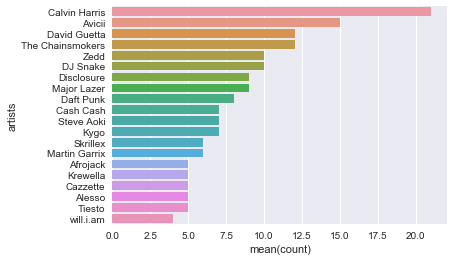

In [30]:
sns.barplot(x="count", y="artists", data=te_counts_graph)

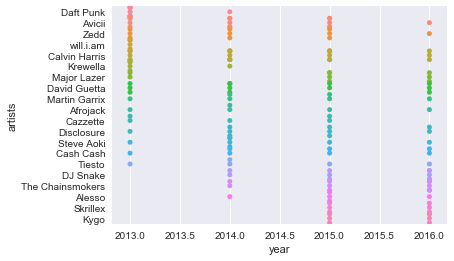

In [31]:
swarme = te_count[te_count['artists'].isin(te_counts_graph.artists)]
sns.swarmplot(x='year',y='artists',data=swarme)

In [6]:
singer_gender = pd.read_csv('singers_gender.csv',encoding='latin-1')
singer_gender = singer_gender.rename(columns={'artist': 'artists'})
singer_gender['artists'] = singer_gender['artists'].str.upper()

In [7]:
tsmerge = pd.DataFrame({'artists':ts.artists.value_counts().index, 'count':ts.artists.value_counts().values})
tsmerge = tsmerge.head(20)
tsmerge['artists'] = tsmerge['artists'].str.upper()

In [319]:
#a = singer_gender[singer_gender.artists.map(lambda x: re.match('SEAN*', x)!= None)]

In [13]:
joints = pd.merge(tsmerge, singer_gender, on='artists', how='left')
#joints.loc[['artists']=='BEYONCE'].gender='female'

In [59]:
#joints.gender.isnull().sum()

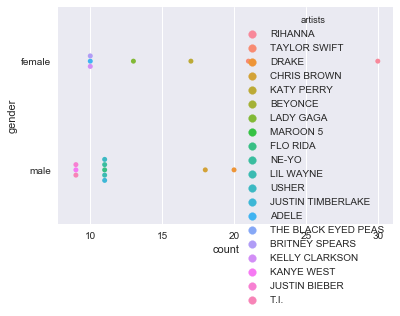

In [72]:
sns.swarmplot(x="count", y="gender", hue = "artists",data=joints)

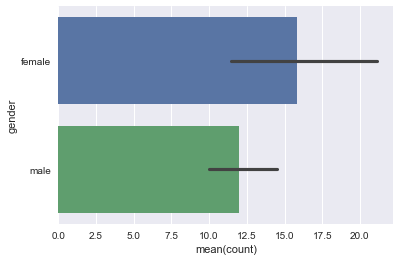

In [74]:
sns.barplot(x="count", y="gender",data=joints)

In [23]:
#joints.plot(x='gender', y='count', kind='bar')
#plt.xticks(rotation='vertical')
#plt.show()

In [22]:
tamerge = ta.copy()
tamerge = tamerge.head(20)
tamerge['artists'] = tamerge['artists'].str.upper()
jointa = pd.merge(tamerge, singer_gender, on='artists', how='left')

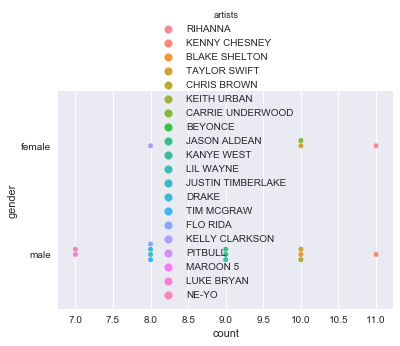

In [24]:
sns.swarmplot(x="count", y="gender", hue = "artists",data=jointa)

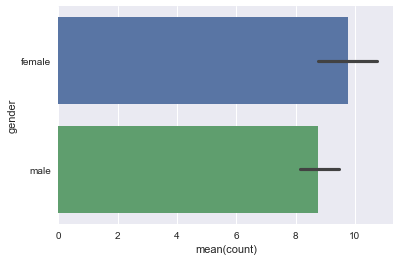

In [25]:
sns.barplot(x="count", y="gender",data=jointa)

In [77]:
#from os import path
#from wordcloud import WordCloud

In [90]:
#a = ts['artists'].astype(str)
#tuples = tuple([tuple(x) for x in ts['artists'].text.value_counts().reset_index().values])


In [91]:
#wordcloud = WordCloud().generate(a)